In [3]:

import os
HOME = os.getcwd()
print(HOME)

C:\Users\karishma.thumu\segment-anything


In [7]:

from IPython.display import Image, display

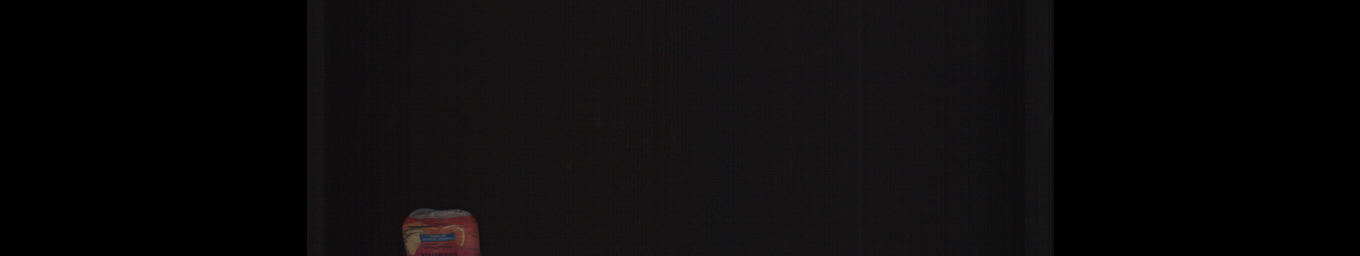

In [10]:
Image(filename=r'C:\AI\Images\000000_VARISORT+ FILM\karishma_18_10_24_08_49\3c52bae4-cc10-4c88-8b19-218ab9249e44.png', width=1024)

In [11]:

!pip install ultralytics
from ultralytics import YOLO

In [1]:
import cv2

# Specify the path to your image
image_path = r'C:\AI\Images\000000_VARISORT+ FILM\karishma_18_10_24_08_49\3c52bae4-cc10-4c88-8b19-218ab9249e44.png'

# Read the image to get its dimensions
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

detections_path = 'C:/AI/Images/000000_VARISORT+ FILM/karishma_18_10_24_08_49/3c52bae4-cc10-4c88-8b19-218ab9249e44.txt'

bboxes = []
class_ids = []

with open(detections_path, 'r') as file:
    for line in file:
        components = line.split()
        class_id = int(components[0])
        cx, cy, w, h = [float(x) for x in components[1:5]]

        # Convert from normalized [0, 1] to image scale
        cx *= image_width
        cy *= image_height
        w *= image_width
        h *= image_height

        # Convert the center x, y, width, and height to xmin, ymin, xmax, ymax
        xmin = cx - w / 2
        ymin = cy - h / 2
        xmax = cx + w / 2
        ymax = cy + h / 2

        class_ids.append(class_id)
        bboxes.append((xmin, ymin, xmax, ymax))

# Display the results
for class_id, bbox in zip(class_ids, bboxes):
    print(f'Class ID: {class_id}, BBox coordinates: {bbox}')


Class ID: 0, BBox coordinates: (0.29295, 0.79995, 0.35545, 0.99405)


In [21]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = r"C:\Users\karishma.thumu\segment-anything\sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [22]:
import cv2
image = cv2.cvtColor(cv2.imread(r'C:\AI\Images\000000_VARISORT+ FILM\karishma_18_10_24_08_49\3c52bae4-cc10-4c88-8b19-218ab9249e44.png'), cv2.COLOR_BGR2RGB)
predictor.set_image(image)

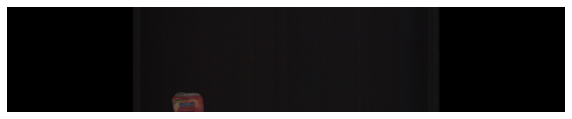

In [23]:
import matplotlib.patches as patches
from matplotlib import pyplot as plt
import numpy as np
import yaml

# Load class names with a single class ID for "pet"
class_names = {0: "pet"}

# Define a color map for the class (you can customize the color)
color_map = {0: np.concatenate([np.random.random(3), np.array([0.6])], axis=0)}

def show_mask(mask, ax, color):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, label, conf_score, color, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    rect = plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(rect)

    label_offset = 10

    # Construct the label with the class name and confidence score
    label_text = f'{label} {conf_score:.2f}'

    ax.text(x0, y0 - label_offset, label_text, color='black', fontsize=10, va='top', ha='left',
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='square,pad=0.4'))

plt.figure(figsize=(10, 10))
ax = plt.gca()
plt.imshow(image)

# Display and process each bounding box with the corresponding mask
for class_id, bbox, conf in zip(class_ids, bboxes, conf_scores):
    class_name = class_names[class_id]
    color = color_map[class_id]
    input_box = np.array(bbox)

    # Generate the mask for the current bounding box
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box,
        multimask_output=False,
    )

    show_mask(masks[0], ax, color=color)
    show_box(bbox, class_name, conf, color, ax)

# Show the final plot
plt.axis('off')
plt.show()


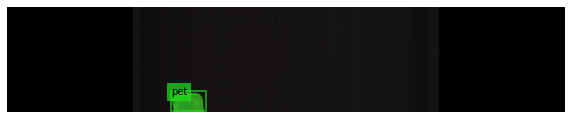

In [5]:
import cv2
import numpy as np
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt

# Load the image and get its dimensions
image_path = r'C:\AI\Images\000000_VARISORT+ FILM\karishma_18_10_24_08_49\3c52bae4-cc10-4c88-8b19-218ab9249e44.png'
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

# Load bounding box data from YOLO text file
detections_path = r'C:/AI/Images/000000_VARISORT+ FILM/karishma_18_10_24_08_49/3c52bae4-cc10-4c88-8b19-218ab9249e44.txt'

bboxes = []
class_ids = []

with open(detections_path, 'r') as file:
    for line in file:
        components = line.split()
        class_id = int(components[0])
        cx, cy, w, h = [float(x) for x in components[1:5]]

        # Convert from normalized [0, 1] to image scale
        cx *= image_width
        cy *= image_height
        w *= image_width
        h *= image_height

        # Convert center coordinates to bounding box format (xmin, ymin, xmax, ymax)
        xmin = cx - w / 2
        ymin = cy - h / 2
        xmax = cx + w / 2
        ymax = cy + h / 2

        class_ids.append(class_id)
        bboxes.append((xmin, ymin, xmax, ymax))

# Load the SAM model
sam_checkpoint = r"C:\Users\karishma.thumu\segment-anything\sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)
predictor.set_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display settings
class_names = {0: "pet"}
color_map = {0: np.array([0.1, 0.9, 0.1, 0.6])}  # Set color for the class
plt.figure(figsize=(10, 10))
ax = plt.gca()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Helper functions to display mask and bounding box
def show_mask(mask, ax, color):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, label, color, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    rect = plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(rect)
    ax.text(x0, y0 - 10, label, color='black', fontsize=10, va='top', ha='left',
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='square,pad=0.4'))

# Process each bounding box and display the result
for class_id, bbox in zip(class_ids, bboxes):
    class_name = class_names.get(class_id, "Unknown")
    color = color_map.get(class_id, [0.1, 0.1, 0.9, 0.6])  # Default color if not defined
    input_box = np.array(bbox)

    # Generate the mask for the current bounding box
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

    # Show the mask and bounding box
    show_mask(masks[0], ax, color=color)
    show_box(bbox, class_name, color, ax)

# Display the final plot
plt.axis('off')
plt.show()


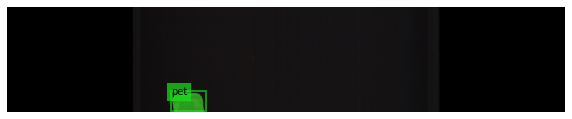

In [6]:
import cv2
import numpy as np
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt

# Load the image and get its dimensions
image_path = r'C:\AI\Images\000000_VARISORT+ FILM\karishma_18_10_24_08_49\3c52bae4-cc10-4c88-8b19-218ab9249e44.png'
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

# Load bounding box data from YOLO text file
detections_path = r'C:/AI/Images/000000_VARISORT+ FILM/karishma_18_10_24_08_49/3c52bae4-cc10-4c88-8b19-218ab9249e44.txt'

bboxes = []
class_ids = []

with open(detections_path, 'r') as file:
    for line in file:
        components = line.split()
        class_id = int(components[0])
        cx, cy, w, h = [float(x) for x in components[1:5]]

        # Convert from normalized [0, 1] to image scale
        cx *= image_width
        cy *= image_height
        w *= image_width
        h *= image_height

        # Convert center coordinates to bounding box format (xmin, ymin, xmax, ymax)
        xmin = cx - w / 2
        ymin = cy - h / 2
        xmax = cx + w / 2
        ymax = cy + h / 2

        class_ids.append(class_id)
        bboxes.append((xmin, ymin, xmax, ymax))

# Load the SAM model
sam_checkpoint = r"C:\Users\karishma.thumu\segment-anything\sam_vit_b_01ec64.pth"
model_type = "vit_b"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)
predictor.set_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Display settings
class_names = {0: "pet"}
color_map = {0: np.array([0.1, 0.9, 0.1, 0.6])}  # Set color for the class
plt.figure(figsize=(10, 10))
ax = plt.gca()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Helper functions to display mask and bounding box
def show_mask(mask, ax, color):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, label, color, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    rect = plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(rect)
    ax.text(x0, y0 - 10, label, color='black', fontsize=10, va='top', ha='left',
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='square,pad=0.4'))

# Process each bounding box and display the result
for class_id, bbox in zip(class_ids, bboxes):
    class_name = class_names.get(class_id, "Unknown")
    color = color_map.get(class_id, [0.1, 0.1, 0.9, 0.6])  # Default color if not defined
    input_box = np.array(bbox)

    # Generate the mask for the current bounding box
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

    # Show the mask and bounding box
    show_mask(masks[0], ax, color=color)
    show_box(bbox, class_name, color, ax)

# Display the final plot
plt.axis('off')
plt.show()